# Settings Environment

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Not Found GPU at: {}'.format(device_name))
else:
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# Python
import pathlib
import os
import shutil
import tarfile

# External
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import cv2

# TF
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pandas as pd
import os

def set_seed(seed=123456):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

SEED = 123456
set_seed(SEED)

pd.set_option('display.max_columns', 30)

-----------

# PARAMS

In [4]:
PARAMS = {
    # PATHS
    'PATH': '/kaggle/input/transport',

    # Datasets Images
    'DS_IMAGES': 'images-transport',

    # DIRECTORY
    'DIRECTORY_SPLIT' : 0.2,
    'DIRECTORY_SEED': 123456,
    'DIRECTORY_IMAGE_SIZE': 312,
    'DIRECTORY_BATCH_SIZE': 32,
    'DIRECTORY_SHUFFLE': 1000,
    
}

----------

# Dataset

In [5]:
data_dir_train = pathlib.Path(os.path.join(PARAMS['PATH'], PARAMS['DS_IMAGES']), 'train').with_suffix('')
data_dir_valid = pathlib.Path(os.path.join(PARAMS['PATH'], PARAMS['DS_IMAGES']), 'valid').with_suffix('')
print(data_dir_train)
print(data_dir_valid)

/kaggle/input/transport/images-transport/train
/kaggle/input/transport/images-transport/valid


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
          data_dir_train,
          #validation_split=PARAMS['DIRECTORY_SPLIT'],
          #subset="training",
          seed=PARAMS['DIRECTORY_SEED'],
          image_size=(PARAMS['DIRECTORY_IMAGE_SIZE'], PARAMS['DIRECTORY_IMAGE_SIZE']),
          batch_size=PARAMS['DIRECTORY_BATCH_SIZE'],
          )

Found 375 files belonging to 4 classes.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir_valid,
        #validation_split=PARAMS['DIRECTORY_SPLIT'],
        #subset="validation",
        seed=PARAMS['DIRECTORY_SEED'],
        image_size=(PARAMS['DIRECTORY_IMAGE_SIZE'], PARAMS['DIRECTORY_IMAGE_SIZE']),
        batch_size=PARAMS['DIRECTORY_BATCH_SIZE'],
        )

Found 92 files belonging to 4 classes.


In [8]:
def log_directory(dataset_images, names):
  for dts, name in zip(dataset_images, names):

      length = 100
      print('-' * length)
      class_names = dts.class_names
      r_dict = {key: [] for key in class_names + ['total_images', 'total_labels']}

      print(f"\n{name:^{length}}\n")

      for images, labels in dts:

        r_dict['total_images'].append(len(images))
        r_dict['total_labels'].append(len(labels))

        lbs = labels.numpy().tolist()

        df = pd.DataFrame({'class': lbs})

        for n in np.unique(lbs):
          idxs = list(df[df['class'] == n].index)
          images_filter = len(tf.gather(images, idxs).numpy())
          r_dict[class_names[n]].append(images_filter)

      for k, v in r_dict.items():
        r_dict[k] =  np.sum(v)

      for key,value in r_dict.items():
	      print(key, ':', value)

In [9]:
log_directory([train_ds, val_ds], ['train', 'valid'])

----------------------------------------------------------------------------------------------------

                                               train                                                

airplane : 288
boat : 21
bus : 32
train : 34
total_images : 375
total_labels : 375
----------------------------------------------------------------------------------------------------

                                               valid                                                

airplane : 71
boat : 5
bus : 8
train : 8
total_images : 92
total_labels : 92


In [10]:
class_names_train = train_ds.class_names
class_names_val_ds = val_ds.class_names

In [11]:
print(class_names_train, class_names_val_ds)

['airplane', 'boat', 'bus', 'train'] ['airplane', 'boat', 'bus', 'train']


In [12]:
class_names_global = ['airplane', 'boat', 'bus', 'train']

print(class_names_global)

['airplane', 'boat', 'bus', 'train']


In [13]:
!pip install autokeras -q

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


-------

# Preview Images

In [14]:
def preview_images(dataset, size):
    class_names = dataset.class_names
    plt.figure(figsize=(size, size))
    for images, labels in dataset.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

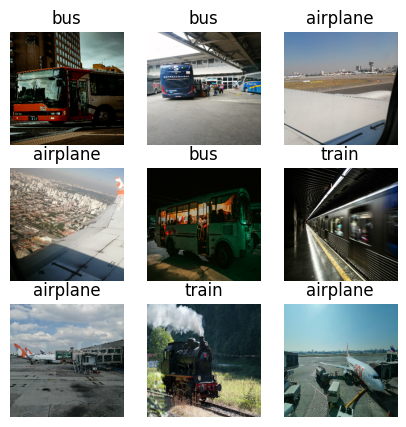

In [15]:
preview_images(train_ds, 5)

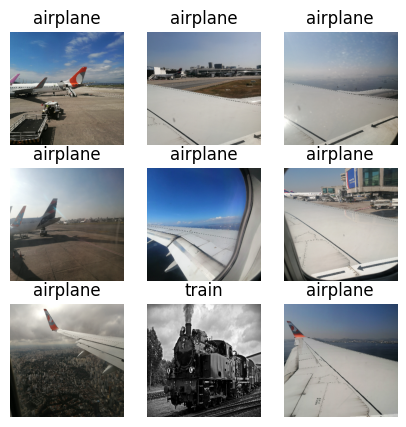

In [16]:
preview_images(val_ds, 5)

--------

# AutoKeras

Learning by documentation >> [AutoKeras](https://autokeras.com/tutorial/image_classification/)

In [17]:
import autokeras as ak

In [18]:
best_model = ak.ImageClassifier(overwrite=True, max_trials=3)
best_model.fit(train_ds, epochs=100)

Trial 3 Complete [01h 03m 13s]
val_loss: 0.6964776515960693

Best val_loss So Far: 0.6032143831253052
Total elapsed time: 02h 28m 29s
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 206s 13s/step - accuracy: 0.6520 - loss: 3.2207
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 169s 13s/step - accuracy: 0.7314 - loss: 1.2768
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 169s 13s/step - accuracy: 0.7819 - loss: 0.9513
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 166s 13s/step - accuracy: 0.7659 - loss: 0.9746
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 170s 13s/step - accuracy: 0.7878 - loss: 0.8651
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 168s 13s/step - accuracy: 0.7275 - loss: 0.8813
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 167s 13s/step - accuracy: 0.7650 - loss: 0.8911
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 169s 13s/step - accuracy: 0.7113 - loss: 0.9719
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 168s 13s/step - accuracy: 0.7170 - loss: 1.0849
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 154s 12s/step - accuracy: 0.7571 - loss: 0.

In [19]:
import random
from PIL import Image

In [20]:
def prediction_img(image, model):

    img_ = np.array(image)
    img_ = np.expand_dims(img_, axis=0)
    
    prediction = model.predict(img_)
    n = prediction[0][0]
    name_class = class_names_global[int(n)]

    return name_class


In [21]:
def preview_images(dataset, w, h, model):
    class_names = class_names_global
    plt.figure(figsize=(w, h))
    for images, labels in dataset.take(1):
        for i in range(15):
            ax = plt.subplot(5, 5, i + 1)
            y_one_pred = prediction_img(images[i], model) 
            plt.imshow(images[i].numpy().astype("uint8"))
            if class_names[labels[i]] == y_one_pred:
                plt.title(f'y_true: {class_names[labels[i]]} \n y_pred: {y_one_pred}', c='green', fontsize=18)
            else:
                plt.title(f'y_true: {class_names[labels[i]]} \n y_pred: {y_one_pred}', c='red', fontsize=18)
            plt.axis("off")

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 430 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/

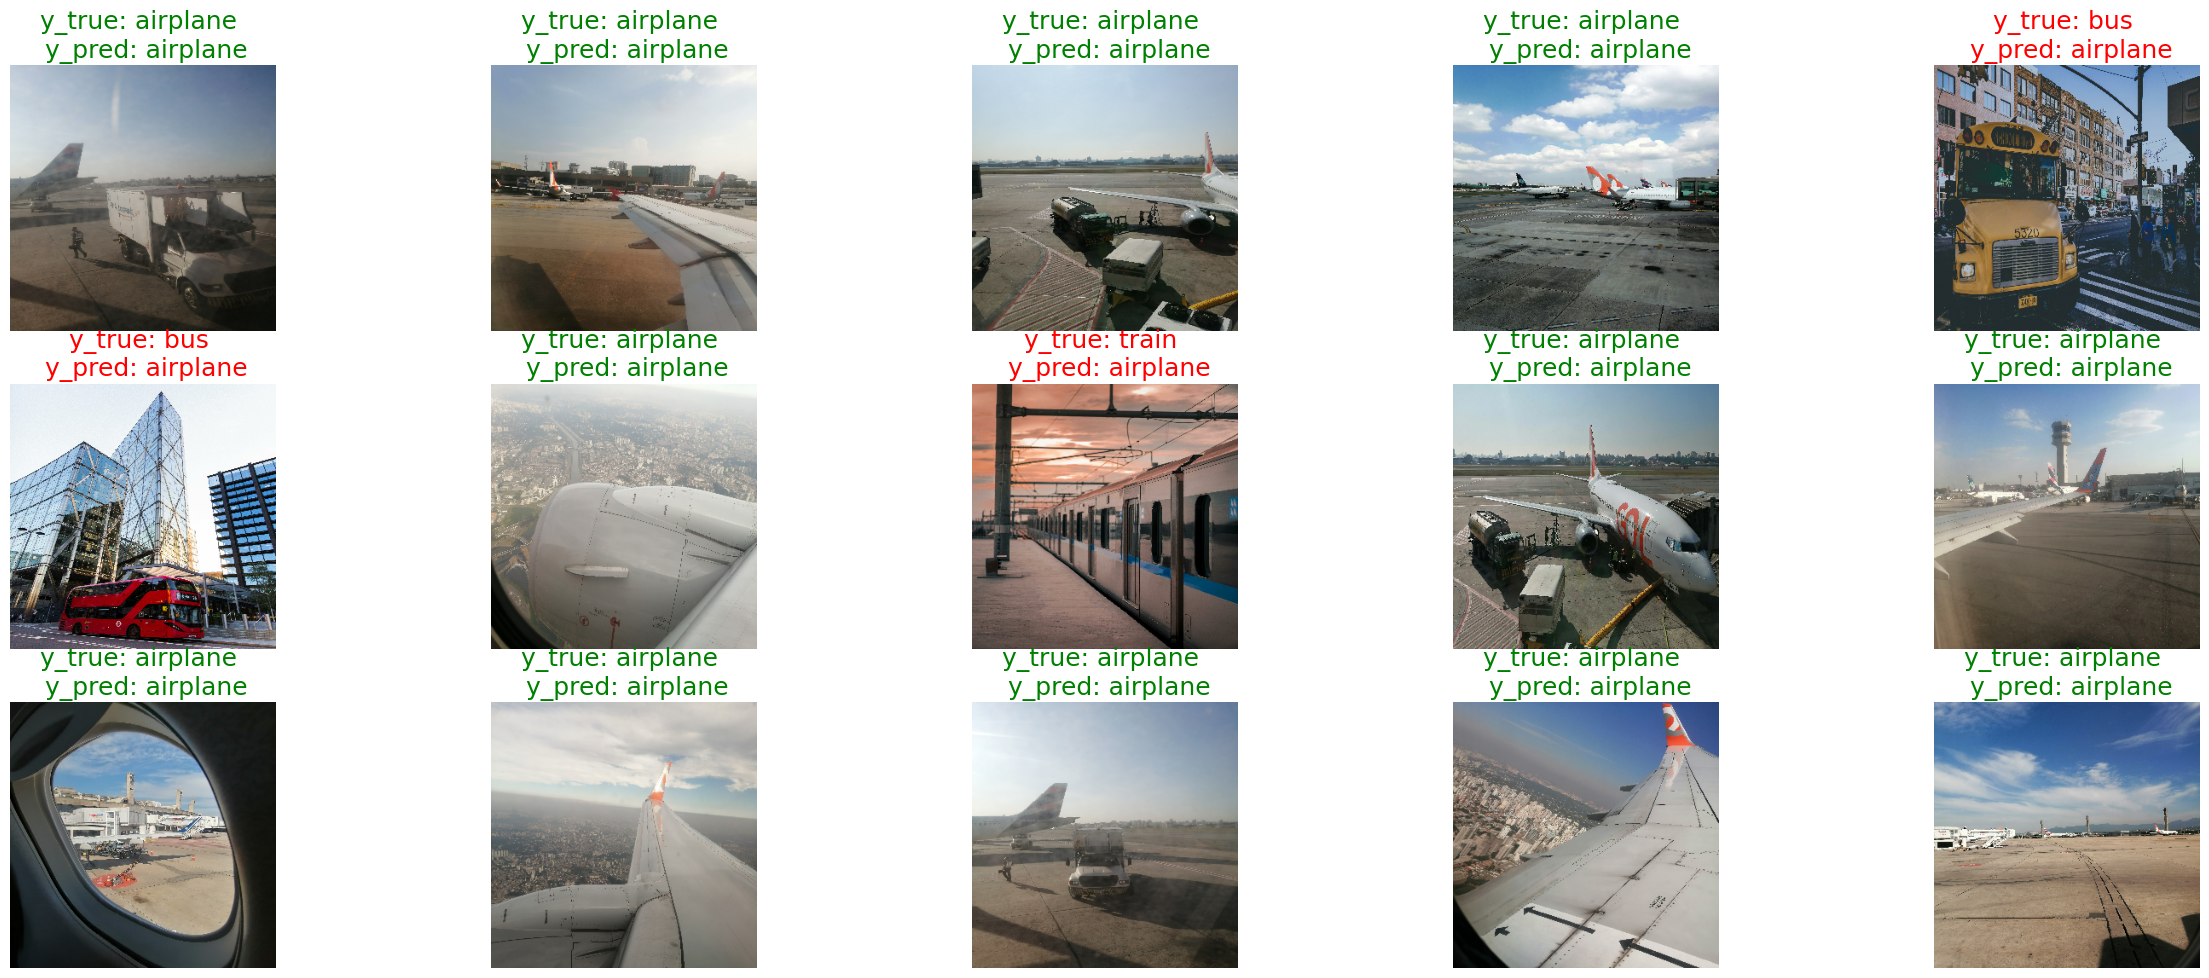

In [22]:
preview_images(train_ds, 30, 20, best_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/

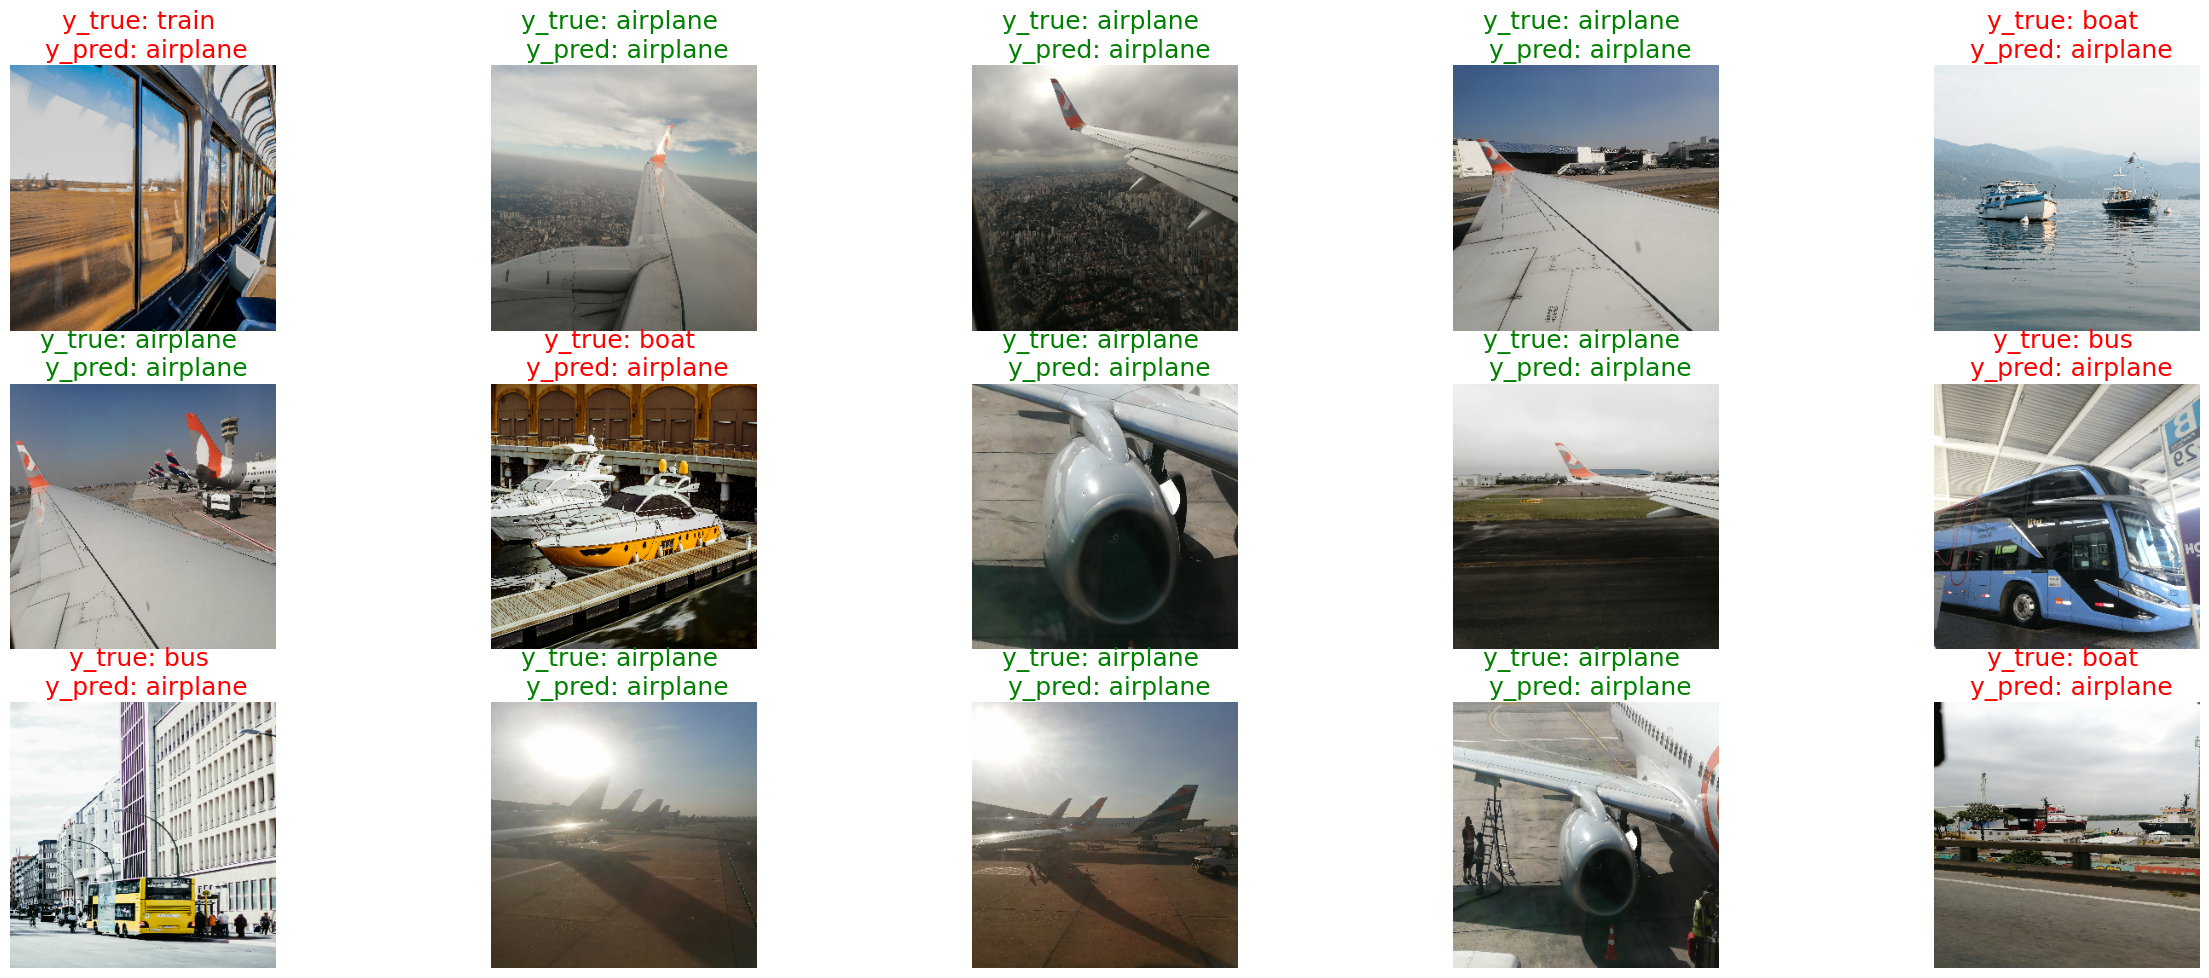

In [23]:
preview_images(val_ds, 30, 20, best_model)

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, dataset):
    norms = [None, 'all', 'true', 'pred']
    fig, ax = plt.subplots(1, len(norms), figsize=(24, 6))
    for idx, norm in enumerate(norms):
        ConfusionMatrixDisplay.from_predictions(y_true,
                                                y_pred,
                                                labels=np.arange(len(class_names_global)),
                                                normalize=norm,
                                                display_labels=class_names_global,
                                                colorbar=False,
                                                ax=ax[idx],
                                                cmap='Blues')
        ax[idx].set_title(f'Norm={norm}')

In [25]:
def return_y_true_and_pred(dataset, model):
  labels = []
  for img, label in dataset:
    labels.append(label)
  y_true =  list(tf.concat(labels, axis=0).numpy())
  pred = model.predict(dataset)
  pred = np.argmax(pred, axis=1)
  assert len(y_true) == len(pred)
  return y_true, pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step


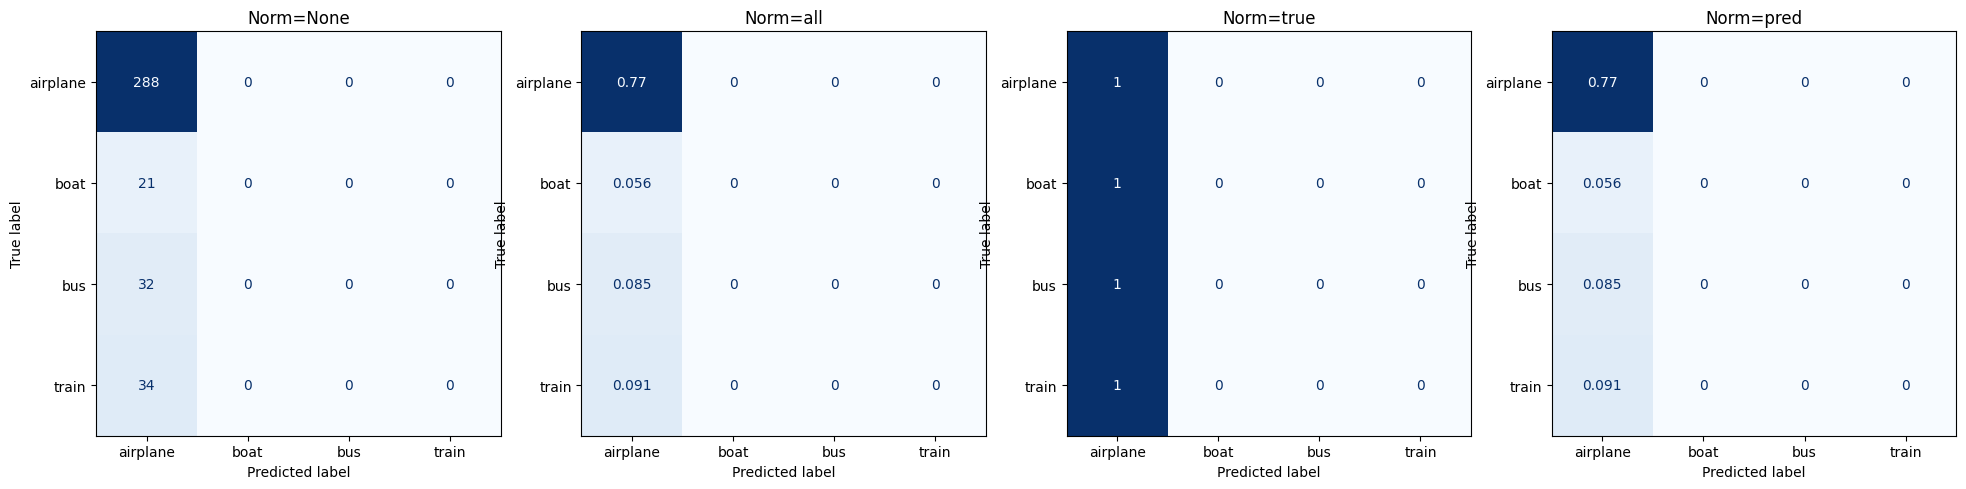

In [26]:
train_y_true, train_pred = return_y_true_and_pred(train_ds, best_model)
plot_confusion_matrix(train_y_true, train_pred, train_ds)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 430 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


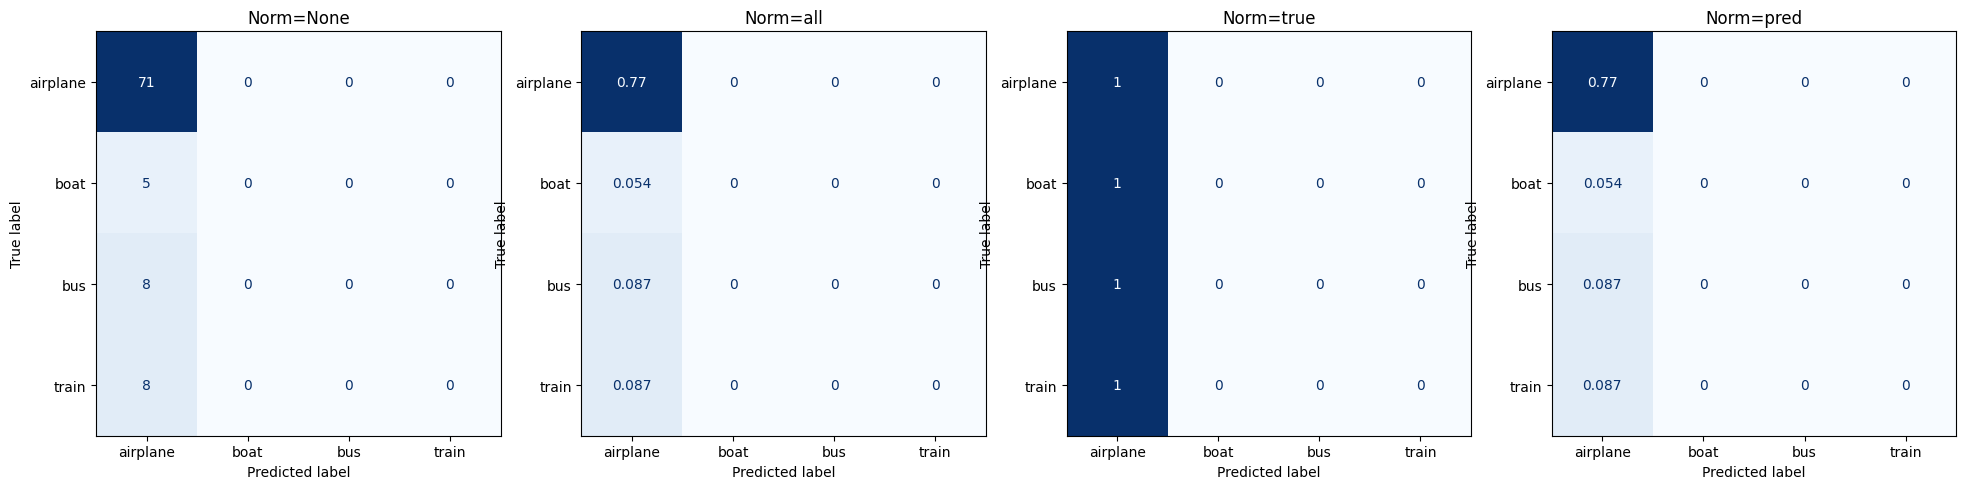

In [27]:
val_y_true, val_pred = return_y_true_and_pred(val_ds, best_model)
plot_confusion_matrix(val_y_true, val_pred, val_ds)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

def full_evaluation(group_y_true: list, group_preds: list):
    df_model_evaluation = {
        'accuracy_score': [],
        'recall_score': [],
        'f1_score': [],
        'precision_score': [],
    }
    idx = ['train_metrics', 'val_metrics']
    for y_true, preds in zip(group_y_true, group_preds):
        df_model_evaluation['accuracy_score'].append(accuracy_score(y_true, preds))  
        df_model_evaluation['recall_score'].append(recall_score(y_true, preds, average='micro'))  
        df_model_evaluation['f1_score'].append(f1_score(y_true, preds, average='micro'))
        df_model_evaluation['precision_score'].append(precision_score(y_true, preds, average='micro'))

    ds = pd.DataFrame(index=idx, data=df_model_evaluation)    
    return ds

In [30]:
eval_ds = full_evaluation([train_y_true, val_y_true], [train_pred, val_pred])
eval_ds

accuracy_score  recall_score  f1_score  precision_score
train_metrics        0.768000      0.768000  0.768000         0.768000
val_metrics          0.771739      0.771739  0.771739         0.771739